In [9]:
import loader
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import itertools
saved_output = []

def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[r]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_gallery_norand(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
#         r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_gallery_predict(images, predict, true, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title('p:' + str(predict[r]) + '   t:' + str(true[r]), size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [10]:
loc_collection = 'Auto_Collection_Gray/'
# shape = 'Square'
shape = 'No_Margin'
char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'h_Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 's_ṣād',
    'd_ḍād'
    , 't_ṭā’‬', 'z_ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
]

sameratio_keepform, diffratio_keepform, sameratio_diffform, diffratio_diffform = loader.main(loc_collection, shape)

# filename = './Training_Files/sameratio_keepform.pkl'
# pickle.dump(sameratio_keepform, open(filename, 'wb'))
# filename = './Training_Files/diffratio_keepform.pkl'
# pickle.dump(diffratio_keepform, open(filename, 'wb'))
# filename = './Training_Files/sameratio_diffform.pkl'
# pickle.dump(sameratio_diffform, open(filename, 'wb'))
# filename = './Training_Files/diffratio_diffform.pkl'
# pickle.dump(diffratio_diffform, open(filename, 'wb'))

print(sameratio_keepform.keys())
print(diffratio_keepform.keys())
print(sameratio_diffform.keys())
print(diffratio_diffform.keys())

All files are .png
sibh=  30 122
sibw=  106 16
libh=  288 131
libw=  144 313
ratio_to_sibh=  0.10416666666666667
ratio_to_sibw=  0.051118210862619806
ratio_to_32_bh=  0.1111111111111111
ratio_to_32_bw=  0.10223642172523961


KeyboardInterrupt: 

In [82]:
filename = './Training_Files/sameratio_keepform.pkl'
test = pickle.load(open(filename, 'rb'))

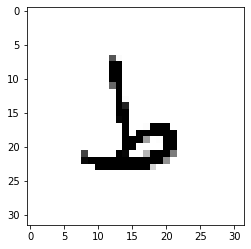

In [86]:
plt.imshow(test['sk_32_bh'][15][0], cmap=plt.cm.gray)

In [ ]:
data_dk = []
label_dk = []
for i in range(0,28):
    for x in range(len(diffratio_keepform['dk_32'][i])):
        gd = diffratio_keepform['dk_32'][i][x]
        data_dk.append(diffratio_keepform['dk_32'][i][x])
        label_dk.append(i)
data_dk = np.array(data_dk)
label_dk = np.array(label_dk)

data_sk = []
data_sk_temp = []
label_sk = []
for i in range(0,28):
    for x in range(len(sameratio_keepform['sk_32_bh'][i])):
        data_sk_temp.append(sameratio_keepform['sk_32_bh'][i][x])
        label_sk.append(i)
for x in range(len(data_sk_temp)):
    h, w = data_sk_temp[x].shape
    if h and w > 32:
        img = cv2.resize(data_sk_temp[x], (32, 32))
        print(x)
    else:
        img = data_sk_temp[x]
    y = list(img.ravel())
    y = np.array(y)
    data_sk.append(y.reshape(32, 32))
data_sk = np.array(data_sk)
label_sk = np.array(label_sk)

data_sd = []
label_sd = []
for i in range(0,28):
    for x in range(len(sameratio_diffform['sd_32'][i])):
        data_sd.append(sameratio_diffform['sd_32'][i][x])
        label_sd.append(i)
data_sd = np.array(data_sd)
label_sd = np.array(label_sd)

data_dd = []
label_dd = []
for i in range(0,28):
    for x in range(len(diffratio_diffform['dd_32'][i])):
        data_dd.append(diffratio_diffform['dd_32'][i][x])
        label_dd.append(i)
data_dd = np.array(data_dd)
label_dd = np.array(label_dd)

In [ ]:
print('sameratio_keepform')
plot_gallery_norand(data_sk, label_sk, 1, 4)
print('diffratio_keepform')
plot_gallery_norand(data_dk, label_dk, 1, 4)
print('sameratio_diffform')
plot_gallery_norand(data_sd, label_sd, 1, 4)
print('diffratio_diffform')
plot_gallery_norand(data_dd, label_dd, 1, 4)

In [8]:
from sklearn.model_selection import train_test_split
test_size = 0.25
random_state = 52

data_train, data_test, y_train, y_test = train_test_split(
data_dk, label_dk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

# filename = './Training_Files/train_dataset.pkl'
# pickle.dump(train, open(filename, 'wb'))
# filename = './Training_Files/test_dataset.pkl'
# pickle.dump(test, open(filename, 'wb'))

In [6]:
print(data_train.shape)
print(y_train.shape)

(1361, 32, 32)
(1361,)


In [27]:
# from keras.preprocessing.image import ImageDataGenerator
# generator = ImageDataGenerator(rescale = 1./255,
#                                width_shift_range=0.1,
#                                height_shift_range=0.1,
#                                shear_range=0.3,
#                                zoom_range=0.3,
#                                horizontal_flip = True)
# generator = generator.flow_from_directory('./Dataset Mobil Ika Candradewi/gambar/training/800_car/',
#                                       target_size = (64, 64),
#                                       batch_size = 800,
# #                                       class_mode = 'sparse',
#                                       class_mode = 'categorical',
#                                       save_to_dir = './Augmentation')
# image_gen, label_gen = next(generator)
# print(image_gen.shape)
# print(label_gen.shape)
# print(loaded_train_brand['target_dict'])
# print(generator.class_indices)
# train_img_aug = np.concatenate((loaded_train_brand['image'], image_gen))
# y_train_brand = np.concatenate((y_train, label_gen))
# print(train_img_aug.shape)
# print(y_train_brand.shape)

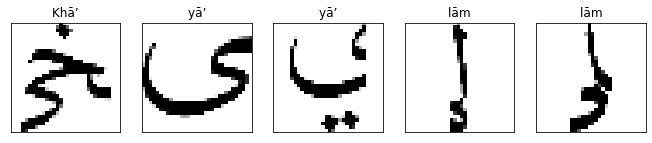

In [7]:
plot_gallery(data_train, y_train, 1,5)

## Load dataset

In [11]:
filename_train = './Training_Files/train_dataset.pkl'
filename_test = './Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

In [19]:
data_train = []
for image in loaded_train['image']:
    data_train.append(cv2.bitwise_not(image))
data_test = []
for image in loaded_test['image']:
    data_test.append(cv2.bitwise_not(image))
data_train = np.array(data_train)
data_test = np.array(data_test)

Training Data 1361


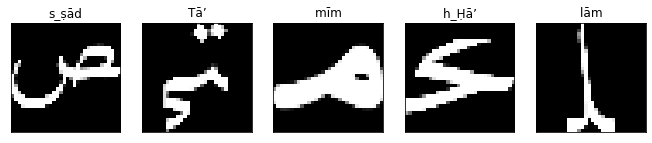

Testing Data 454


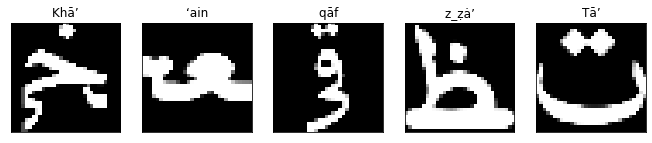

In [20]:
print('Training Data', len(loaded_train['image']))
plot_gallery(data_train, loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(data_test, loaded_test['label'], 1, 5)

In [21]:
# data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

# data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

## LeNet-5

In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.model_selection import StratifiedKFold
import numpy
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
#                              patience=10, verbose=1, mode='auto')
# earlystopper = EarlyStopping(monitor='val_accuracy', min_delta=0,
#                              patience=5, verbose=1, mode='auto')
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=10, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir='./tensorboard_brandnew')
# checkpointer = ModelCheckpoint(#filepath='./ModelCheckpoint/weights_brandnew.hdf5',
#                                filepath='./ModelCheckpoint/model.{epoch:02d}-{val_loss:.2f}.h5',
#                                verbose=1, save_best_only=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model = Sequential()
    #Layer 1
    #Conv Layer 1
    model.add(Conv2D(filters = 6,  kernel_initializer='he_normal', kernel_regularizer='l2',
                     kernel_size = 5, 
                     strides = 1, 
                     activation = 'relu', 
                     input_shape = (32,32,1)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    #Pooling layer 1
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Layer 2
    #Conv Layer 2
    model.add(Conv2D(filters = 16, kernel_initializer='he_normal',
                     kernel_size = 5,
                     strides = 1,
                     activation = 'relu',
                     input_shape = (14,14,6)))
#     model.add(Dropout(0.1))
#     model.add(BatchNormalization())
    #Pooling Layer 2
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Flatten
    model.add(Flatten())
#     model.add(BatchNormalization())
    #Layer 3
    #Fully connected layer 1
    model.add(Dense(units = 120, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
    model.add(Dropout(0.1))
    #Layer 4
    #Fully connected layer 2
    model.add(Dense(units = 84, activation = 'relu', kernel_initializer='normal'))
    model.add(Dropout(0.1))
#     model.add(BatchNormalization())
    #Layer 5
    #Output Layer
    model.add(Dense(units = 28, activation = 'softmax'))

    # Compile model
    model.compile(optimizer = 'RMSProp', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Fit the model
#     model.fit(X[train], y_cat[train], epochs=8, batch_size=16, verbose=1)
    h = model.fit(X[train] ,y_cat[train], epochs = 64,
                    batch_size = 16, 
                    validation_data = [X[test], y_cat[test]],
                    )
#                       callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = './Training_Files/best_model_LeNet.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('LeNet5')
    filename = './Training_Files/LeNet_'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
# summarize history for accuracy
filename = './Training_Files/'history_LeNet.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
model.summary()

In [ ]:
model_name = './Training_Files/best_model_LeNet.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
# print(loaded_test_brand['target_dict'])
# print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, char_list_nameonly)

In [ ]:
false_id = []
false_img = []
false_label = []
false_true_id = []
for x in range(len(y_pred)):
    if y_pred[x] != y_test[x]:
        false_id.append(x)
        false_img.append(data_test[x].reshape(32, 32))
        false_label.append(char_list_nameonly[y_pred[x]])
        false_true_id.append(char_list_nameonly[y_test[x]])
print('False: ', len(false_id))

plot_gallery_predict(false_img, predict=false_label, true=false_true_id, n_row=4, n_col=8)
# p = predict, t = true

In [ ]:
del model
del history

## DenseNet

In [ ]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [ ]:
K.clear_session()

In [ ]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
# Calculate Inference Time
# repetitions = 10
# input = np.random.randn(1, *input_shape)

# output = model.predict(input)
# start = time()
# for _ in range(repetitions):
#   output = model.predict(input)
  
# print((time() - start) / repetitions)

In [ ]:
%%time
input_shape = 32, 32, 1
n_classes = 28

K.clear_session()
# model = alexnet(input_shape, n_classes)
model = densenet(input_shape, n_classes, f=6)
model.summary()

In [ ]:
%%time
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = 64,
                    batch_size = 16, 
                    validation_data = [X[test], y_cat[test]],
                    )
#                       callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = './Training_Files/best_model_DenseNet.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('DenseNet')
    filename = './Training_Files/DenseNet_'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
# summarize history for accuracy
filename = './Training_Files/'history_DenseNet.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
model.summary()

In [ ]:
model_name = './Training_Files/best_model_DenseNet.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
# print(loaded_test_brand['target_dict'])
# print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, char_list_nameonly)

In [ ]:
false_id = []
false_img = []
false_label = []
false_true_id = []
for x in range(len(y_pred)):
    if y_pred[x] != y_test[x]:
        false_id.append(x)
        false_img.append(data_test[x].reshape(32, 32))
        false_label.append(char_list_nameonly[y_pred[x]])
        false_true_id.append(char_list_nameonly[y_test[x]])
print('False: ', len(false_id))

plot_gallery_predict(false_img, predict=false_label, true=false_true_id, n_row=4, n_col=8)
# p = predict, t = true

In [ ]:
del model
del history

## El-Sawy et al (2017)

In [11]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.model_selection import StratifiedKFold
import numpy
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
from keras import backend as K 
K.clear_session()

In [ ]:
# model = Sequential()
# # C1
# model.add(Conv2D(filters = 80, 
#                  kernel_regularizer='l2',
# #                  kernel_initializer='he_normal',
#                  kernel_size = 5,
#                  activation = 'relu', 
#                  input_shape = (32,32,1)))
# # model.add(Dropout(0.1))
# # model.add(BatchNormalization())
# # S2
# model.add(MaxPooling2D(pool_size = 2))
# # C3
# model.add(Conv2D(filters = 64,
#                  kernel_regularizer='l2',
# #                  kernel_initializer='he_normal',
#                  kernel_size = 5,
#                  activation = 'relu' ))
# #     model.add(Dropout(0.1))
# #     model.add(BatchNormalization())
# # S4
# model.add(MaxPooling2D(pool_size = 2))
# # FC 5
# model.add(Flatten())
# model.add(Dense(units = 1024, 
#                 activation = 'relu',
# #                 kernel_initializer='he_normal',
#                 kernel_regularizer='l2'))
# # model.add(Dropout(0.1))
# #Output Layer
# model.add(Dense(units = 28, activation = 'softmax'))

# # Compile model
# model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# # Fit the model
# # h = model.fit(X[train] ,y_cat[train], epochs = 30,
# #               batch_size = 256, 
# #               validation_data = [X[test], y_cat[test]],
# #               verbose = 1
# #                 )
# #                       callbacks = [earlystopper])
# #                     callbacks=[checkpointer, earlystopper, tensorboard])

# #     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # history.append(h)

In [12]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
#                              patience=10, verbose=1, mode='auto')
# earlystopper = EarlyStopping(monitor='val_accuracy', min_delta=0,
#                              patience=5, verbose=1, mode='auto')
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=10, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir='./tensorboard_brandnew')
# checkpointer = ModelCheckpoint(#filepath='./ModelCheckpoint/weights_brandnew.hdf5',
#                                filepath='./ModelCheckpoint/model.{epoch:02d}-{val_loss:.2f}.h5',
#                                verbose=1, save_best_only=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model = Sequential()
    # C1
    model.add(Conv2D(filters = 80, 
                     kernel_regularizer='l2',
    #                  kernel_initializer='he_normal',
                     kernel_size = 5,
                     activation = 'relu', 
                     input_shape = (32,32,1)))
    # model.add(Dropout(0.1))
    # model.add(BatchNormalization())
    # S2
    model.add(MaxPooling2D(pool_size = 2))
    # C3
    model.add(Conv2D(filters = 64,
                     kernel_regularizer='l2',
    #                  kernel_initializer='he_normal',
                     kernel_size = 5,
                     activation = 'relu' ))
    #     model.add(Dropout(0.1))
    #     model.add(BatchNormalization())
    # S4
    model.add(MaxPooling2D(pool_size = 2))
    # FC 5
    model.add(Flatten())
    model.add(Dense(units = 1024, 
                    activation = 'relu',
    #                 kernel_initializer='he_normal',
                    kernel_regularizer='l2'))
    # model.add(Dropout(0.1))
    #Output Layer
    model.add(Dense(units = 28, activation = 'softmax'))

    # Compile model
    model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#     Fit the model
    h = model.fit(X[train] ,y_cat[train], epochs = 64,
                  batch_size = 16, 
                  validation_data = [X[test], y_cat[test]],
                  verbose = 1
                    )
#                           callbacks = [earlystopper])
#                         callbacks=[checkpointer, earlystopper, tensorboard])
    history.append(h)

    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = './Training_Files/best_model_El-Shawy_mod.pkl'
        pickle.dump(model, open(filename, 'wb'))
#         model.save('LeNet5')
    filename = './Training_Files/El-Shawy_mod_'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1088 samples, validate on 273 samples
Epoch 1/64
1088/1088 [==============================] - 26s 24ms/step - loss: 16.3025 - accuracy: 0.0625 - val_loss: 16.0544 - val_accuracy: 0.0696
Epoch 2/64
1088/1088 [==============================] - 19s 18ms/step - loss: 15.8622 - accuracy: 0.0974 - val_loss: 15.6496 - val_accuracy: 0.0916
Epoch 3/64
1088/1088 [==============================] - 19s 18ms/step - loss: 15.4182 - accuracy: 0.1287 - val_loss: 15.1888 - val_accuracy: 0.1905
Epoch 4/64
1088/1088 [==============================] - 20s 19ms/step - loss: 14.8801 - accuracy: 0.2086 - val_loss: 14.6206 - val_accuracy: 0.2564
Epoch 5/64
1088/1088 [==============================] - 20s 18ms/step - loss: 14.2463 - accuracy: 0.2702 - val_loss: 13.9692 - val_accuracy: 0.3040
Epoch 6/64
1088/1088 [==============================] - 20s 18ms/step - loss: 13.6009 - accuracy: 0.3787 - val_loss: 13.4214 - val_accuracy: 0.3773
Epoch 7/64
1088/1088 [==============================] - 19

KeyboardInterrupt: 

k =  1


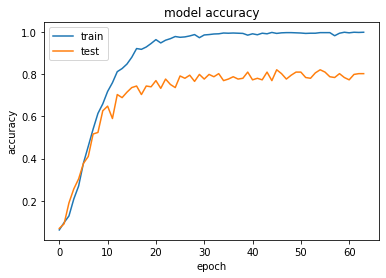

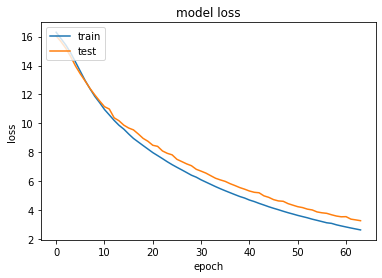

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        128064    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dense_4 (Dense)              (None, 28)               

In [13]:
# summarize history for accuracy
filename = './Training_Files/history_El-Shawy_mod.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
model.summary()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.45      0.56      0.50        27
           2       0.76      0.78      0.77        32
           3       0.83      0.83      0.83        18
           4       0.79      0.50      0.61        22
           5       0.56      0.58      0.57        24
           6       0.70      0.79      0.75        24
           7       1.00      1.00      1.00         5
           8       0.80      1.00      0.89         4
           9       1.00      0.88      0.93         8
          10       1.00      1.00      1.00         5
          11       0.67      0.77      0.71        13
          12       0.87      0.81      0.84        16
          13       0.94      1.00      0.97        15
          14       0.90      0.82      0.86        11
          15       0.88      1.00      0.93         7
          16       1.00      0.92      0.96        12
          17       0.69    

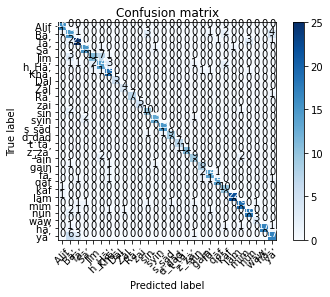

In [14]:
model_name = './Training_Files/best_model_El-Shawy_mod.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
# print(loaded_test_brand['target_dict'])
# print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, char_list_nameonly)

In [ ]:
del model
del history

## Najadat et al (2019)

In [15]:
from keras import backend as K 
K.clear_session()

In [ ]:
# model = Sequential()
# # Conv1
# model.add(Conv2D(filters = 16, 
# #                  kernel_regularizer='l2',
# #                  kernel_initializer='he_normal',
#                  kernel_size = 5,
#                  activation = 'relu', 
#                  input_shape = (32,32,1)))
# # Conv2
# model.add(Conv2D(filters = 16, 
# #                  kernel_regularizer='l2',
# #                  kernel_initializer='he_normal',
#                  kernel_size = 5,
#                  activation = 'relu'))
# # model.add(Dropout(0.1))
# # model.add(BatchNormalization())
# # Pool1
# model.add(MaxPooling2D(pool_size = 2, strides = 2))
# # Conv3
# model.add(Conv2D(filters = 32, 
# #                  kernel_regularizer='l2',
# #                  kernel_initializer='he_normal',
#                  kernel_size = 5,
#                  activation = 'relu', 
#                  input_shape = (32,32,1)))
# # Conv4
# model.add(Conv2D(filters = 32, 
# #                  kernel_regularizer='l2',
# #                  kernel_initializer='he_normal',
#                  kernel_size = 5,
#                  activation = 'relu', 
#                  input_shape = (32,32,1)))
# # model.add(Dropout(0.1))
# # model.add(BatchNormalization())
# # Pool2
# model.add(MaxPooling2D(pool_size = 2, strides = 2))
# # 3FC
# model.add(Flatten())
# model.add(Dense(units = 64, 
#                 activation = 'relu',
# #                 kernel_initializer='he_normal',
#                 kernel_regularizer='l2'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(units = 32, 
#                 activation = 'relu',
# #                 kernel_initializer='he_normal',
#                 kernel_regularizer='l2'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# #Output Layer
# model.add(Dense(units = 28, activation = 'softmax'))

# # Compile model
# model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# # Fit the model
# # h = model.fit(X[train] ,y_cat[train], epochs = 40,
# #               batch_size = 16, 
# #               validation_data = [X[test], y_cat[test]],
# #               verbose = 1
# #                 )
# #                       callbacks = [earlystopper])
# #                     callbacks=[checkpointer, earlystopper, tensorboard])

# #     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # history.append(h)

In [ ]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
#                              patience=10, verbose=1, mode='auto')
# earlystopper = EarlyStopping(monitor='val_accuracy', min_delta=0,
#                              patience=5, verbose=1, mode='auto')
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=10, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir='./tensorboard_brandnew')
# checkpointer = ModelCheckpoint(#filepath='./ModelCheckpoint/weights_brandnew.hdf5',
#                                filepath='./ModelCheckpoint/model.{epoch:02d}-{val_loss:.2f}.h5',
#                                verbose=1, save_best_only=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model = Sequential()
    # Conv1
    model.add(Conv2D(filters = 16, 
    #                  kernel_regularizer='l2',
    #                  kernel_initializer='he_normal',
                     kernel_size = 5,
                     activation = 'relu', 
                     input_shape = (32,32,1)))
    # Conv2
    model.add(Conv2D(filters = 16, 
    #                  kernel_regularizer='l2',
    #                  kernel_initializer='he_normal',
                     kernel_size = 5,
                     activation = 'relu'))
    # model.add(Dropout(0.1))
    # model.add(BatchNormalization())
    # Pool1
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    # Conv3
    model.add(Conv2D(filters = 32, 
    #                  kernel_regularizer='l2',
    #                  kernel_initializer='he_normal',
                     kernel_size = 5,
                     activation = 'relu', 
                     input_shape = (32,32,1)))
    # Conv4
    model.add(Conv2D(filters = 32, 
    #                  kernel_regularizer='l2',
    #                  kernel_initializer='he_normal',
                     kernel_size = 5,
                     activation = 'relu', 
                     input_shape = (32,32,1)))
    # model.add(Dropout(0.1))
    # model.add(BatchNormalization())
    # Pool2
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    # 3FC
    model.add(Flatten())
    model.add(Dense(units = 64, 
                    activation = 'relu',
    #                 kernel_initializer='he_normal',
                    kernel_regularizer='l2'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(units = 32, 
                    activation = 'relu',
    #                 kernel_initializer='he_normal',
                    kernel_regularizer='l2'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    #Output Layer
    model.add(Dense(units = 28, activation = 'softmax'))

    # Compile model
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#     Fit the model
    h = model.fit(X[train] ,y_cat[train], epochs = 64,
                  batch_size = 16, 
                  validation_data = [X[test], y_cat[test]],
                  verbose = 1
                    )
#                           callbacks = [earlystopper])
#                         callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)

    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = './Training_Files/best_model_Najadat_mod.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('LeNet5')
    filename = './Training_Files/Najadat_mod_'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
# summarize history for accuracy
filename = './Training_Files/history_Najadat_mod.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
model.summary()

In [ ]:
model_name = './Training_Files/best_model_Najadat.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
# print(loaded_test_brand['target_dict'])
# print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, char_list_nameonly)